In [22]:
import os
import sys
import re
import difflib
import numpy as np
import pandas as pd
#import ipyfilechooser
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

## Modify the drug labels in filenames

This is a routine to check filenames of pickle files generated by this script : **`<yyyymmdd>_generate_tierpsy_features.ipynb`** and lives in **`/share/data/temp/daniel/<yyyymmdd>_tierpsy_features/`**

In [26]:
# True (standardized) drug names taken from Jerneja's plot diagrams
drug_names = ['AA', 'Dopamine','Fluoxetine','Methiothepin', 'None', 'Octopamine', 'Serotonin',
               'Tyramine', 'Alphamethyl', 'Chlorpromazine', 'Clomipramine','Imipramine',  
               'Mianserin','Paroxetine', 'Phentolamine', 'Quinpirole', 'Raclopride']

In [3]:
# according to the file naming convention, the position of drug name is after the 5th underscore
drug_pos = 5

# TODO : maybe use ipyfilechooser 
#data_folder = "/share/data/temp/daniel/20200211_tierpsy_features/"
data_folder = "/share/data/temp/athira/tierpsy_skeleton_files_for_eigen_npy/"

# get all filenames from the data_folder
(_,_, skel_feat_fnames) = next(os.walk(data_folder))

In [4]:
for feat_fname in skel_feat_fnames:
    
    #if feat_fname.endswith('features_JDA.pickle'):
    if feat_fname.endswith('.npy'):
        
        old_path = os.path.join(data_folder,feat_fname)
        
        # get only the alpha (name and not conc) part of the drug label
        drug_conc = re.findall(r"[^\W\d_]+|\d+", feat_fname.split('_')[drug_pos])
        
        # find the closest match of the drug name from the list "drug_names"
        true_drug_name = difflib.get_close_matches(feat_fname.split('_')[drug_pos], drug_names, 
                                                  n= 1, cutoff= 0.6)
        
        # replace the old spelling with the closest match 
        feat_fname = feat_fname.replace(drug_conc[0],true_drug_name[0])
        
        
        # rename the file
        new_path = os.path.join(data_folder, str(feat_fname))
        os.rename(old_path, new_path)
    
    

In [7]:
# Check if any files are mispelled

def check_mispelled(data_folder, drug_names):
    

    (_,_, skel_feat_fnames) = next(os.walk(data_folder))
    
    list_paths_mis = []
    n_mis = 0

    for filename in skel_feat_fnames:

        # only applied to (JDA) feature files : read note above  
        #if filename.endswith('features_JDA.pickle'):
        if filename.endswith('.npy'):

            # get only the alpha and numeric part of the drug label
            drug_conc = re.findall(r"[^\W\d_]+|\d+", filename.split('_')[drug_pos])


            # if drug name (wxclusing the conc) is not one in the list "drug_names"
            #if (difflib.get_close_matches(drug_conc[0], drug_names, n= 1, cutoff= 1)) == None:
            if drug_conc[0] not in drug_names:
                n_mis += 1
                list_paths_mis.append(os.path.join(data_folder,filename))
                
    return n_mis, list_paths_mis
            

In [8]:
check_mispelled(data_folder, drug_names)

(0, [])

In [11]:
# Routine to list all unique drug names (with concentrations)

def list_meta_drugs(data_folder):
    
    drug_list = []
    drug_name_conc_list = []

    (_,_, skel_feat_fnames) = next(os.walk(data_folder))
    
    for feat_fname in skel_feat_fnames:

        #if feat_fname.endswith('features_JDA.pickle'):
        if feat_fname.endswith('.npy'):

            drug = feat_fname.split('_')[drug_pos]
            drug_name_conc = re.findall(r"[^\W\d_]+|\d+", drug)
            
            if drug not in drug_list:
                drug_list.append(drug)
                drug_name_conc_list.append(drug_name_conc)              

    drug_list = (sorted(drug_list))
    drug_name_conc_list = sorted(drug_name_conc_list)
    
    return drug_list,drug_name_conc_list

In [12]:
list_meta_drugs(data_folder)


(['AA',
  'Alphamethyl',
  'Chlorpromazine01',
  'Clomipramine10',
  'Dopamine',
  'Fluoxetine10',
  'Imipramine10',
  'Methiothepin',
  'Methiothepin1',
  'Mianserin',
  'None',
  'Octopamine',
  'Octopamine100',
  'Paroxetine1',
  'Phentolamine',
  'Quinpirole0003',
  'Quinpirole003',
  'Raclopride',
  'Serotonin100',
  'Tyramine'],
 [['AA'],
  ['Alphamethyl'],
  ['Chlorpromazine', '01'],
  ['Clomipramine', '10'],
  ['Dopamine'],
  ['Fluoxetine', '10'],
  ['Imipramine', '10'],
  ['Methiothepin'],
  ['Methiothepin', '1'],
  ['Mianserin'],
  ['None'],
  ['Octopamine'],
  ['Octopamine', '100'],
  ['Paroxetine', '1'],
  ['Phentolamine'],
  ['Quinpirole', '0003'],
  ['Quinpirole', '003'],
  ['Raclopride'],
  ['Serotonin', '100'],
  ['Tyramine']])

## Once and for all

In [113]:
def correct_drug_conc(data_folder, drug_pos):
    
    # get all filenames from the data_folder
    (_,_, skel_fnames) = next(os.walk(data_folder))
    
    # True (standardized) drug names taken from Jerneja's plot diagrams
    drug_names = ['AA', 'Dopamine','Fluoxetine','Methiothepin', 'None', 'Octopamine', 'Serotonin',
                   'Tyramine', 'Alphamethyl', 'Chlorpromazine', 'Clomipramine','Imipramine',  
                   'Mianserin','Paroxetine', 'Phentolamine', 'Quinpirole', 'Raclopride']

    path_list_temp = []
    
    for skel_fname in skel_fnames:

        #if skel_fname.endswith('features_JDA.pickle'):
        if skel_fname.endswith('.hdf5'):

            old_path = os.path.join(data_folder,skel_fname)

            # get only the alpha (name and not conc) part of the drug label
            drug_conc = re.findall(r"[^\W\d_]+|\d+", skel_fname.split('_')[drug_pos])
            drug_ = skel_fname.split('_')[drug_pos]

            # find the closest match of the drug name from the list "drug_names"
            true_drug_name = difflib.get_close_matches(skel_fname.split('_')[drug_pos], drug_names, 
                                                      n= 1, cutoff= 0.6)
            
            if drug_conc[0] == 'Quinpirole':
                # replace the old spelling with the closest match 
                skel_fname = skel_fname.replace(drug_conc[0],true_drug_name[0])
            else:
                skel_fname = skel_fname.replace(drug_,true_drug_name[0])

            # rename the file
            new_path = os.path.join(data_folder, str(skel_fname))
            os.rename(old_path, new_path)  
            
#             path_list_temp.append(new_path)
#     return path_list_temp

In [115]:
# Path to modified skeleton files - these hdf5 files has additional datasets in them. 
path_skel_folder = "/share/data/temp/athira/Tierpsy_skeleton_files_may15/" 
path_to_skel_files = [os.path.join(root,name) for root,dirs,filenames in os.walk(path_skel_folder) 
                                              for name in filenames]

print(f"Number of skeleton files in the new folder : {len(path_to_skel_files)} ")

Number of skeleton files in the new folder : 4087 


In [130]:
path_to_skel_files[3415]

'/share/data/temp/athira/Tierpsy_skeleton_files_may15/20180725_112809_1_5m0s_Imipramine_None_None_skeletons.hdf5'

In [100]:
def get_subset(path_to_skel_files, quality_thresh = 40, n_frames_thresh = 200):
    
    # List of skeleton files with quality > 40% and n_frames >= 200
    subset_list = []
    for file_path in path_to_skel_files:
        
        if file_path.endswith('.hdf5'):
            
            skeletons_store = h5py.File(file_path, 'r')

            if (skeletons_store['quality'][()] > 40) & (skeletons_store['n_frames'][()] > 200):

                subset_list.append(file_path)
            skeletons_store.close()
        
    return subset_list

In [136]:
subset_skelfiles = get_subset(path_to_skel_files)

In [137]:
df_drugs_reference = pd.DataFrame()
df_drugs_reference['filename'] = [filepath for filepath in path_to_skel_files]
df_drugs_reference['drug'] = [(os.path.basename(filepath)).split('_')[4] for filepath in path_to_skel_files]

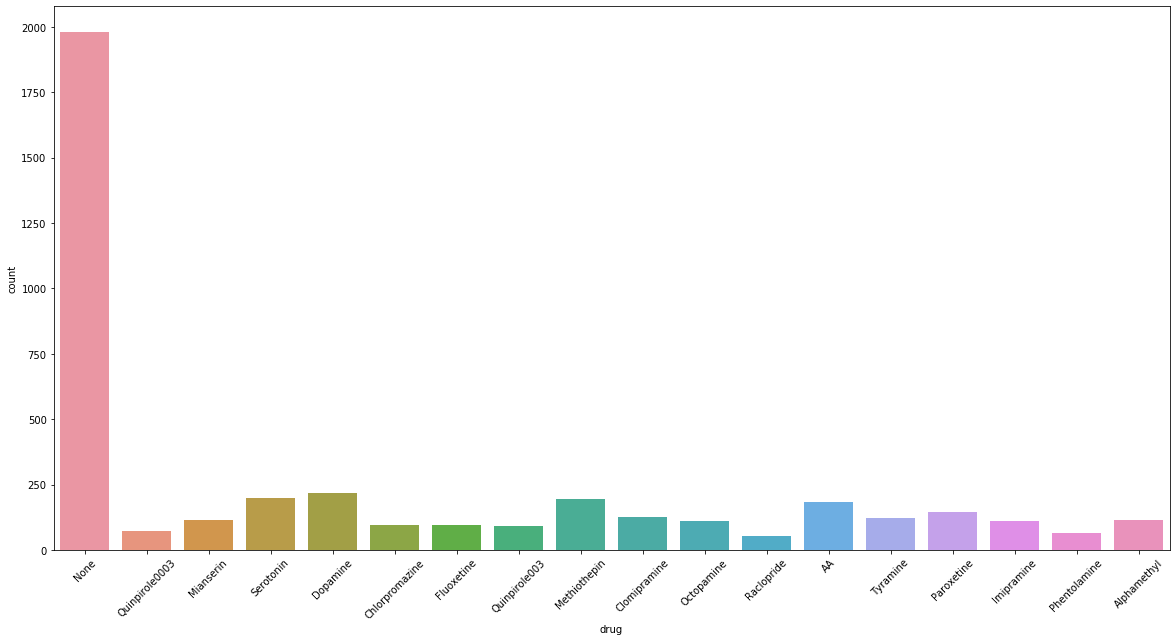

In [138]:
fig, axes = plt.subplots(figsize=(20,10))
sns.countplot(data=df_drugs_reference, x='drug')
axes.set_xticklabels(axes.get_xticklabels(),rotation=45);

In [88]:
# df_drugs_reference['new_path'] = correct_drug_conc(path_skel_folder, 4)

In [89]:
# df_drugs_reference['renamed_drug'] = [(os.path.basename(filepath)).split('_')[4] for filepath in list(df_drugs_reference['new_path'])]

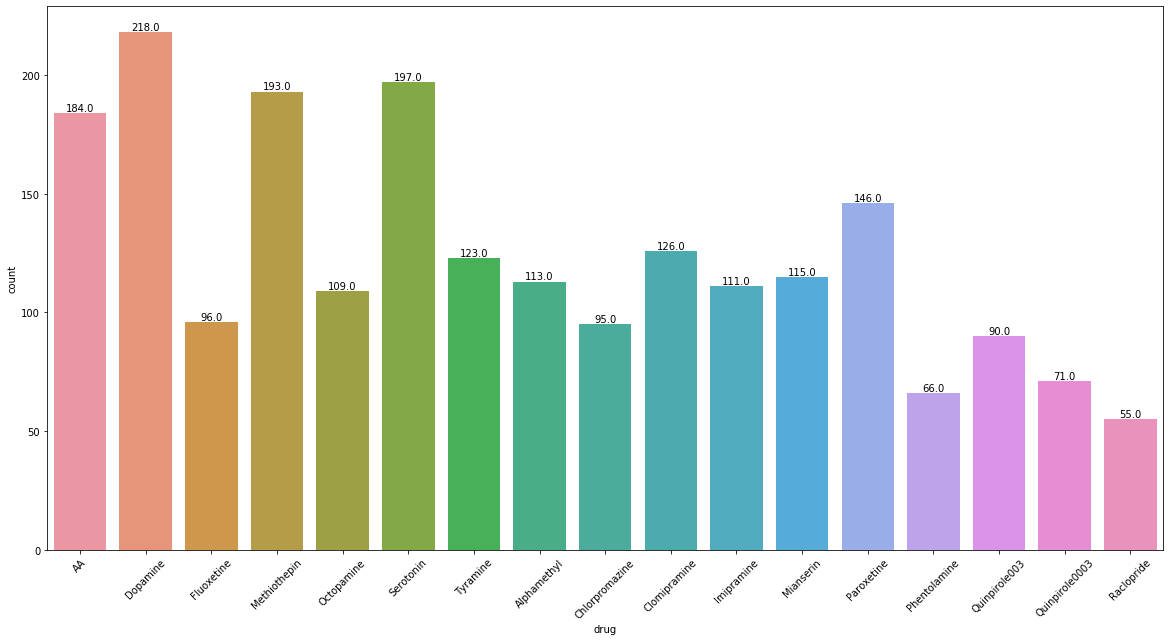

In [139]:
fig, axes = plt.subplots(figsize=(20,10))
drug_order = ['AA', 'Dopamine','Fluoxetine','Methiothepin','Octopamine', 'Serotonin',
                   'Tyramine', 'Alphamethyl', 'Chlorpromazine', 'Clomipramine','Imipramine',  
                   'Mianserin','Paroxetine', 'Phentolamine', 'Quinpirole003','Quinpirole0003', 'Raclopride']
# sns.countplot(data=df_drugs_reference, x='renamed_drug', order=drug_order)
sns.countplot(data=df_drugs_reference, x='drug', order=drug_order)
axes.set_xticklabels(axes.get_xticklabels(),rotation=45);

for p in axes.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes.annotate('{:}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [140]:
df_drugs_reference = df_drugs_reference[df_drugs_reference['filename'].isin(subset_skelfiles)]

In [141]:
df_drugs_reference

,filename,drug
0,/share/data/temp/athira/Tierpsy_skeleton_files...,None
1,/share/data/temp/athira/Tierpsy_skeleton_files...,None
2,/share/data/temp/athira/Tierpsy_skeleton_files...,None
3,/share/data/temp/athira/Tierpsy_skeleton_files...,None
4,/share/data/temp/athira/Tierpsy_skeleton_files...,Quinpirole0003
...,...,...
4074,/share/data/temp/athira/Tierpsy_skeleton_files...,Methiothepin
4076,/share/data/temp/athira/Tierpsy_skeleton_files...,AA
4078,/share/data/temp/athira/Tierpsy_skeleton_files...,None
4082,/share/data/temp/athira/Tierpsy_skeleton_files...,Dopamine


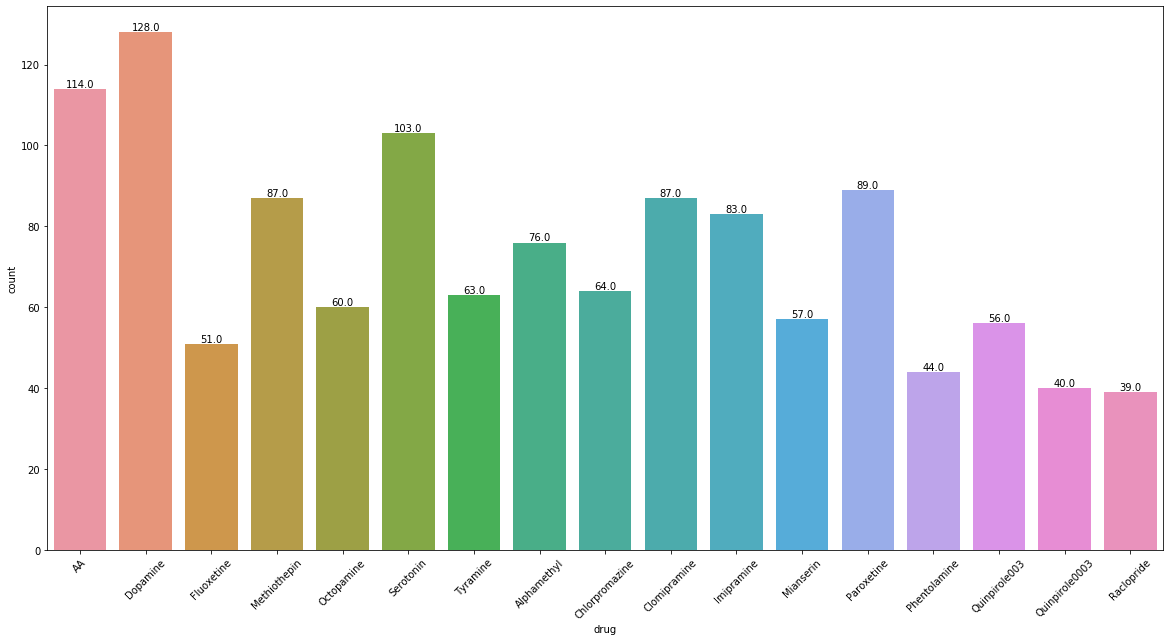

In [143]:
fig, axes = plt.subplots(figsize=(20,10))
drug_order = ['AA', 'Dopamine','Fluoxetine','Methiothepin','Octopamine', 'Serotonin',
                   'Tyramine', 'Alphamethyl', 'Chlorpromazine', 'Clomipramine','Imipramine',  
                   'Mianserin','Paroxetine', 'Phentolamine', 'Quinpirole003','Quinpirole0003', 'Raclopride']
sns.countplot(data=df_drugs_reference, x='drug', order=drug_order)
axes.set_xticklabels(axes.get_xticklabels(),rotation=45);

for p in axes.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes.annotate('{:}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

## Hereby changing the names permanently

In [114]:
correct_drug_conc(path_skel_folder, 4)

In [145]:
df_drugs_reference['light'] = [(os.path.basename(filepath)).split('_')[6] for filepath in list(df_drugs_reference['filename'])]

In [146]:
df_drugs_reference = df_drugs_reference[df_drugs_reference['light'].isin(['None','None (2)'])]

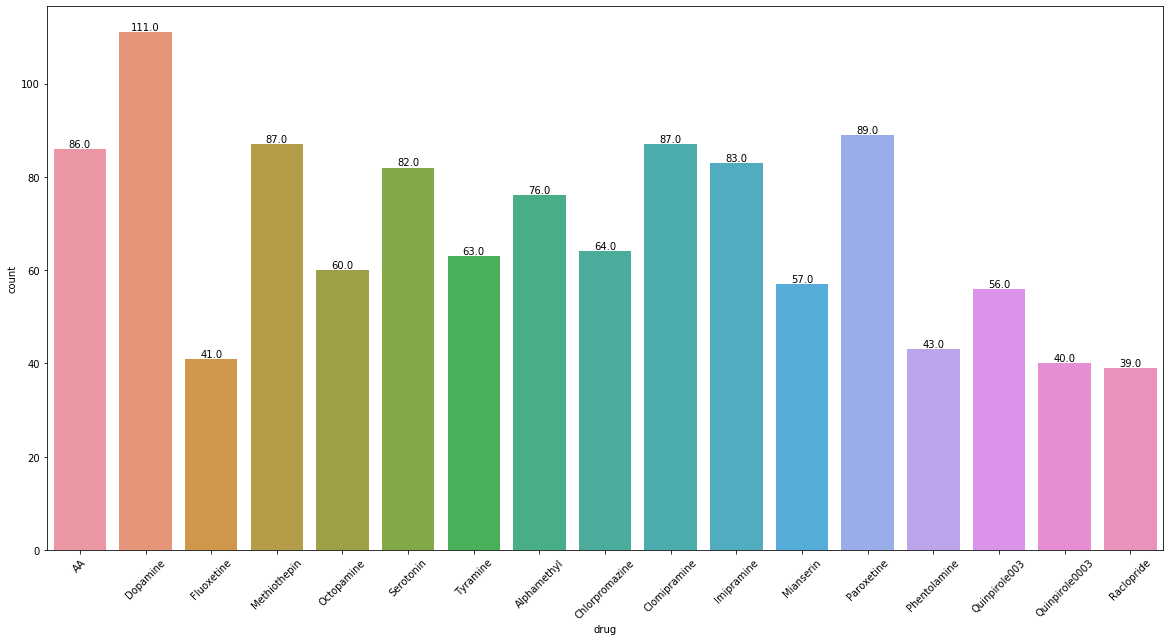

In [147]:
fig, axes = plt.subplots(figsize=(20,10))
drug_order = ['AA', 'Dopamine','Fluoxetine','Methiothepin','Octopamine', 'Serotonin',
                   'Tyramine', 'Alphamethyl', 'Chlorpromazine', 'Clomipramine','Imipramine',  
                   'Mianserin','Paroxetine', 'Phentolamine', 'Quinpirole003','Quinpirole0003', 'Raclopride']
sns.countplot(data=df_drugs_reference, x='drug', order=drug_order)
axes.set_xticklabels(axes.get_xticklabels(),rotation=45);

for p in axes.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes.annotate('{:}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text